# Implémentation des modèles du kNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

 Grâce à la fonction make_blobs, nous allons générer un datasets pouvant être subdivisé en 3 clusters.
    Après quoi, nous écrirons les fonctions de calcul de distance, de tri, et de prédiction. Notons que nous travaillons pour l'instant dans le contexte de la classification.

Dimensions de X :  (400, 3) 
Dimension de y :  (400, 1)


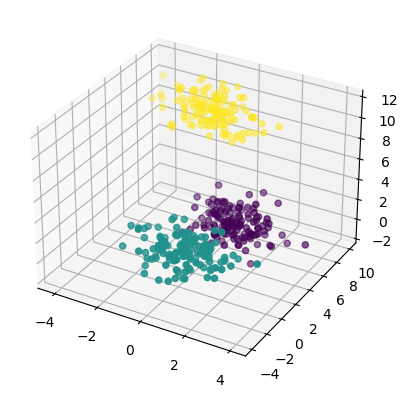

In [2]:
X,y = make_blobs(n_samples=400,n_features = 3, centers = 3,random_state = 0)
y = y.reshape(y.shape[0],1)

print("Dimensions de X : ",X.shape,"\nDimension de y : ",y.shape)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap = 'viridis')
plt.xticks()
plt.yticks()
plt.show()


Soit un nouvel élément de composantes (-5,7,3). On cherche à prédire la classe d'appartenance d'un tel élément.

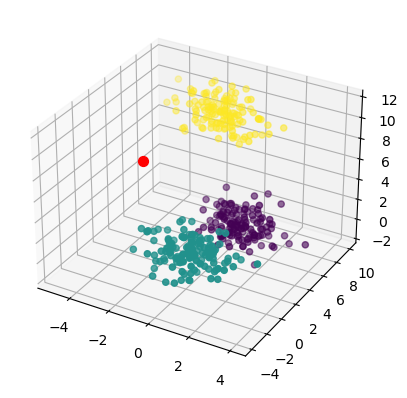

In [3]:
nouvel_element = (-5,7,3)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap = 'viridis')
ax.scatter(nouvel_element[0],nouvel_element[1],nouvel_element[2],c='red',s=50)
plt.show()

In [6]:
#Mise en place de la fonction de calcul des distances (euclidienne)
def calcul_distance(Data,nouvel_element):
    couple_donnee_distance = []
    for i in range (Data.shape[0]):
        somme_carre_diff = 0
        for j in range(Data.shape[1]):
            somme_carre_diff += (nouvel_element[j] - Data[i][j])**2
        couple_donnee_distance.append((i,somme_carre_diff**0.5))
    
    return couple_donnee_distance

#Fonction de tri par ordre croissant suivant les distances
def tri_croissant(couple_donnee_distance):
    for i in range (len(couple_donnee_distance)):
        for j in range(i+1,len(couple_donnee_distance)):
            if couple_donnee_distance[i][1] > couple_donnee_distance[j][1]:
                t = couple_donnee_distance[i] 
                couple_donnee_distance[i]  = couple_donnee_distance[j]
                couple_donnee_distance[j] = t
    return (couple_donnee_distance)

#Fonction de prédiction
def prediction_class(couple_donnee_distance,y,nombre_voisin):
    etiquette_des_voisins = []
    for i in range(nombre_voisin):
        etiquette_des_voisins.append(y[(couple_donnee_distance[i][0]),0])
        
    prediction = (Counter(etiquette_des_voisins)).most_common(1)[0][0]    
    return(prediction)

def kNN_class(X,y,k,nouvel_element):
    return prediction_class(tri_croissant(calcul_distance(X,nouvel_element)),y,k)  
    

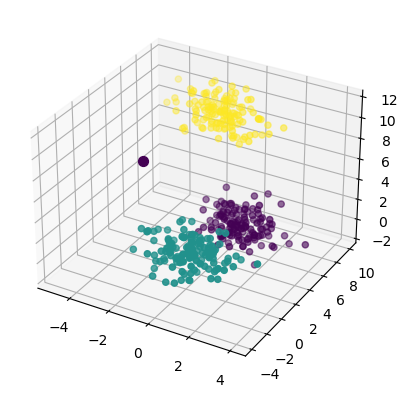

In [7]:
classe_nouvel_element = kNN_class(X,y,150,nouvel_element)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap = 'viridis')
ax.scatter(nouvel_element[0],nouvel_element[1],nouvel_element[2],c=classe_nouvel_element,s=50)
plt.show()

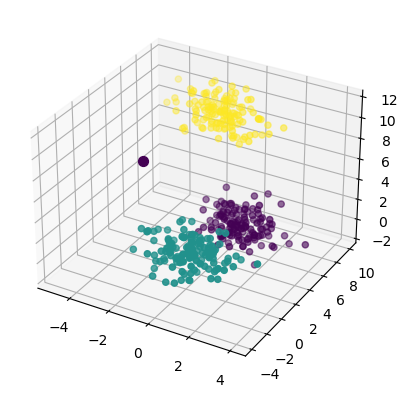

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=150)
model.fit(X,y)
resultat = model.predict(np.array(nouvel_element).reshape(1,3))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap = 'viridis')
ax.scatter(nouvel_element[0],nouvel_element[1],nouvel_element[2],c=resultat,s=50)
plt.show()

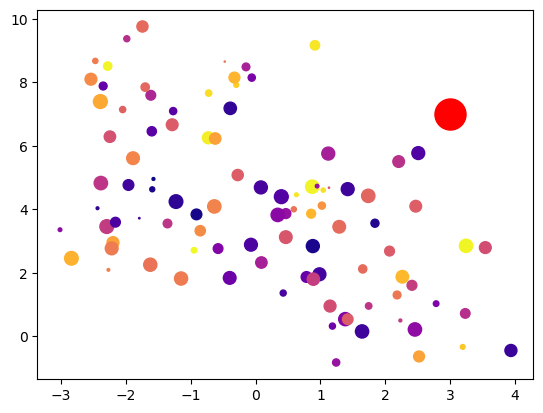

In [9]:
X,_ = make_blobs(n_samples=100,n_features = 2, centers = 4,random_state = 0)
Poids_des_elements = 100*np.random.rand(X.shape[0])
np.random.seed(0)
couleurs = np.random.rand(X.shape[0])
nouvel_element = (3,7)

fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=couleurs,s=Poids_des_elements,cmap = 'plasma')
plt.scatter(nouvel_element[0],nouvel_element[1],c='red',s=500)
plt.show()

In [10]:
#Fonction de prédiction
def prediction_reg(couple_donnee_distance,y,nombre_voisin):
    poids_des_voisins = []
    for i in range(nombre_voisin):
        
        poids_des_voisins.append(y[couple_donnee_distance[i][0]])
    
    return (np.sum(poids_des_voisins))/len(poids_des_voisins)


def kNN_reg(X,y,k,nouvel_element):
    return prediction_reg(tri_croissant(calcul_distance(X,nouvel_element)),y,k) 
      

55.314921221172675


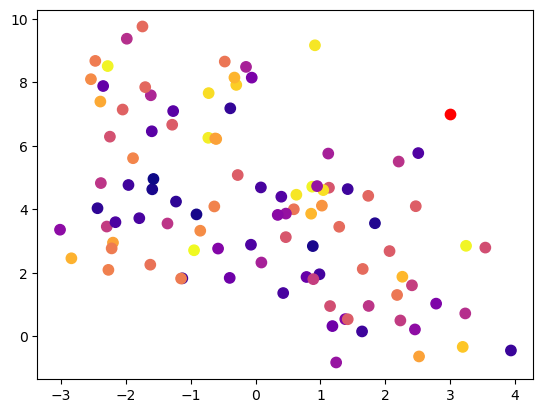

In [11]:
poids = kNN_reg(X,Poids_des_elements,10,nouvel_element)

print(poids)
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=couleurs,s=poids,cmap = 'plasma')
plt.scatter(nouvel_element[0],nouvel_element[1],c='red',s=poids)
plt.show()

[55.31492122]


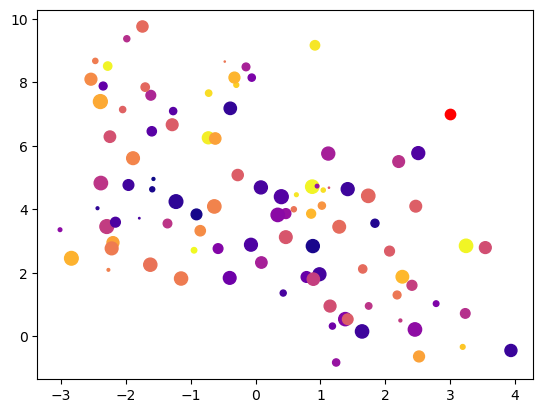

In [12]:
from sklearn.neighbors import KNeighborsRegressor

model_ = KNeighborsRegressor(n_neighbors=10)
model_.fit(X,Poids_des_elements)
poids_ = model_.predict(np.array(nouvel_element).reshape(1,2))

print(poids_)
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=couleurs,s=Poids_des_elements,cmap = 'plasma')
plt.scatter(nouvel_element[0],nouvel_element[1],c='red',s=poids_)
plt.show()


Parlons à présent du choix du meilleur nombre de proches voisins. Nous allons utiliser le modèle de KNeighborsClassifier. Commençons par générer un test set.

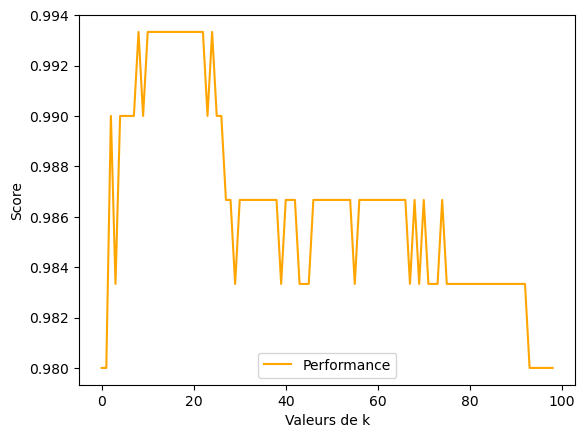

In [13]:
X,y = make_blobs(n_samples=1500,n_features = 3, centers = 5,random_state = 0)
y = y.reshape(y.shape[0],1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

performance = []

for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    performance.append(model.score(X_test,y_test))

plt.plot(performance,c='orange',label = "Performance")
plt.xlabel('Valeurs de k')
plt.ylabel('Score')
plt.legend(loc='lower center')
plt.show()

Un meilleur choix de k sera autour de 20 voisins. 